## Ejemplo 4: Curva ROC / AUC

### 1. Objetivos:
    - Aprender a evaluar un modelo de clasificación binaria utilizando una curva ROC / AUC.
    
---
    
### 2. Desarrollo:

Tenemos entonces que una curva ROC / AUC se ve así:

![imagen](https://github.com/manu-msr/beduadp/blob/master/sesion08/Imgs/sesion_8-9.png?raw=true)

El eje `y` representa la proporción de Verdaderos Positivos, que es lo mismo que la Sensibilidad.

El eje `x` representa la proporción de Falsos Positivos. Esto quiere decir: de todas las clasificaciones negativas que había en realidad, cuántas fueron clasificadas como positivas por nuestro modelo. Para obtener este valor, restamos el valor de Especificidad a 1 (`1 - especificidad`).

La curva ROC grafica el cambio en la proporción de Verdaderos Positivos contra la proporción de Falsos Positivos a través de diferentes *umbrales*.

La AUC (Area Under The Curve), o área debajo de la curva, es toda el área que se encuentra por debajo de la curva ROC. Podemos tener un valor entre 0 y 1.

Un valor de AUC cercano a 1, como el que podemos ver en el dibujo anterior, significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos. Además, es muy probable que elija el valor correcto.

Un valor de AUC cercano al 0.5 significa que nuestro modelo no puede diferenciar entre positivos y negativos. Un valor cercano al 0.5 se vería así:

![imagen](https://github.com/manu-msr/beduadp/blob/master/sesion08/Imgs/sesion_8-10.png?raw=true)

Un valor cercano a 0 significa que nuestro modelo es muy bueno para diferenciar entre positivos y negativos **pero** elige casi siempre el valor contrario al real. O sea, elige positivos cuando debería de elegir negativos, y viceversa. Esta gráfica se vería así:

![imagen](https://github.com/manu-msr/beduadp/blob/master/sesion08/Imgs/sesion_8-11.png?raw=true)

Volvamos a entrenar nuestro modelo para evaluarlo con una curva ROC / AUC:

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manu-msr/beduadp/master/Datasets/breast_cancer_wisconsin.csv', index_col=0)
df = df.drop(columns=['Unnamed: 32'])
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [3]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

La matriz de confusión requiere de resultados binarios, es decir 'correcto' o 'incorrecto', 'positivo' o 'negativo', como estos:

In [5]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

Para graficar una curva ROC / AUC necesitamos resultados probabilísticos, como estos:

In [6]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[9.99990598e-01, 9.40198600e-06],
       [9.88771045e-01, 1.12289554e-02],
       [1.60611058e-09, 9.99999998e-01],
       [1.45294737e-03, 9.98547053e-01],
       [9.99670228e-01, 3.29772124e-04],
       [4.10609979e-03, 9.95893900e-01],
       [2.39160458e-07, 9.99999761e-01],
       [9.98462757e-01, 1.53724256e-03],
       [1.16616639e-05, 9.99988338e-01],
       [1.00727525e-02, 9.89927248e-01]])

En esta matriz, cada vector tiene dos valores. El primer valor es la probabilidad de que el valor sea negativo. El segundo valor es la probabilidad de que el valor sea positivo. Necesitamos los resultados de esta manera para poder modificar el umbral y obtener los puntos necesarios para generar la curva ROC.

In [7]:
from sklearn.metrics import roc_curve, auc

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

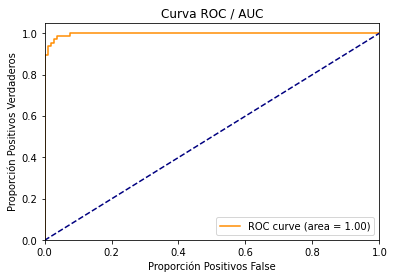

In [9]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción Positivos False')
plt.ylabel('Proporción Positivos Verdaderos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()

Como era de esperarse, nuestro valor AUC es muy cercano al 1 (0.99). Esto significa que nuestro modelo puede diferenciar casi a la perfección entre negativos y positivos, y que además es muy probable que elija la clasificación correcta.